# 📘 Adult Census Income Prediction

## 📌 Project Objective

The objective of this project is to build a Binary Classification Machine Learning model that predicts whether an individual’s income is greater than 50K (>50K) or less than or equal to 50K (≤50K) using the Adult Census Income dataset.

In addition to model building, this project also includes data visualization and exploratory analysis to better understand:

Income distribution

Feature relationships

Class imbalance

Model performance

These visual insights help in making informed preprocessing and modeling decisions.

### 🛠️ Libraries & Tools

Python – Programming language

Pandas, NumPy – Data manipulation and numerical computation

Scikit-learn – Machine learning models, preprocessing, and evaluation

Matplotlib, Seaborn – Data visualization and graphical analysis

Google Colab – Development and execution environment

#### 🔹 1. Import Required Librarie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### 🔹 2. Load the Dataset

In [3]:
# Load Adult Census dataset
df = pd.read_csv("adult.csv")

# Show first 5 records
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### 🔹 3. Exploratory Data Analysis (EDA)

##### ✅ 3.1 Dataset Shape

In [4]:
df.shape


(32561, 15)

##### ✅ 3.2 Check for Missing Values

In [5]:
df.isna().sum()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

##### ✅ 3.3 Dataset Information

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### ✅ 3.4 Class Distribution of Target Variable

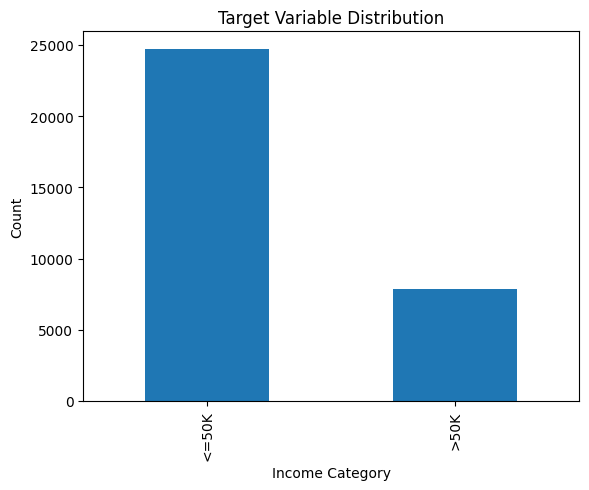

In [7]:
income_counts = df['income'].value_counts()

plt.figure()
income_counts.plot(kind='bar')
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.title("Target Variable Distribution")
plt.show()

#### 🔹 4. Data Cleaning

##### ✅ 4.1 Replace '?' with 'Others'

In [8]:
df.replace('?', 'Others', inplace=True)


##### ✅ 4.2 Drop Redundant Column (education)

In [9]:
df.drop(columns=['education'], inplace=True)


##### ✅ 4.3 Remove Outliers (Age < 17 or Age > 75)

In [10]:
df = df[(df['age'] >= 17) & (df['age'] <= 75)]


##### ✅ 4.4 Age Distribution 

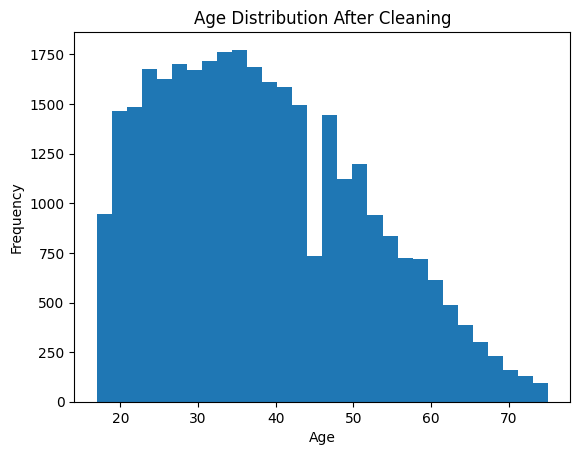

In [11]:
plt.figure()
plt.hist(df['age'], bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution After Cleaning")
plt.show()


 ##### ✅ 4.5 Again Dataset Shape

In [12]:
df.shape
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

#### 🔹 5. Feature Engineering

##### ✅ 5.1 Separate Features and Target Variable

In [13]:
X = df.drop('income', axis=1)
y = df['income']


#####  ✅ 5.2 Label Encoding for Categorical Features

In [14]:
le = LabelEncoder()

for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


##### ✅ 5.3 Workclass vs Income

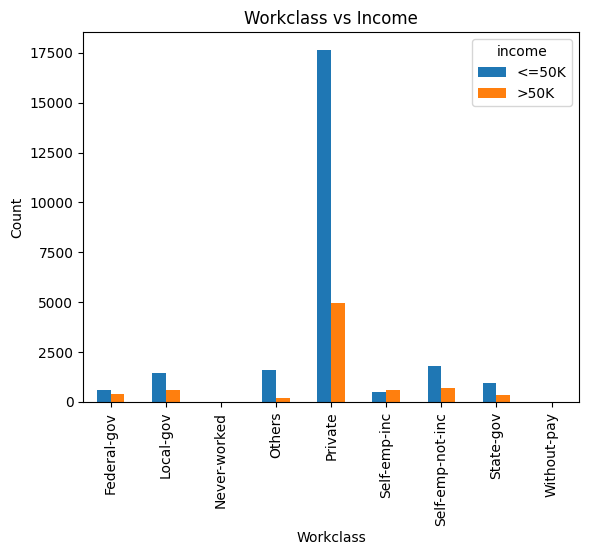

In [15]:
pd.crosstab(df['workclass'], df['income']).plot(kind='bar')
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.title("Workclass vs Income")
plt.show()


##### ✅ 5.4 Income vs Hours-per-week

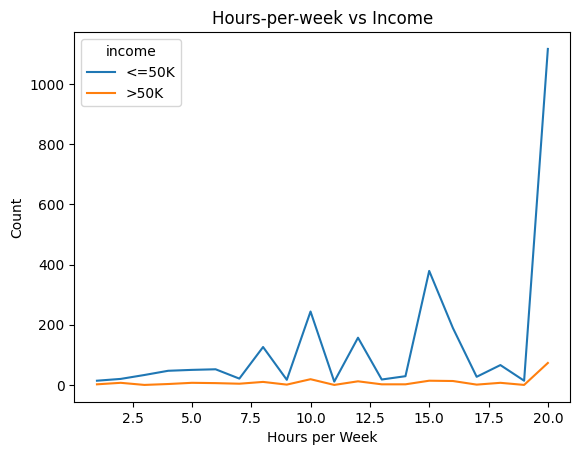

In [16]:
pd.crosstab(df['hours.per.week'], df['income']).head(20).plot()
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.title("Hours-per-week vs Income")
plt.show()


#####  ✅ 5.5 Encode Target Variable

In [17]:
y = le.fit_transform(y)   # <=50K → 0, >50K → 1


#### 🔹 6. Feature Scaling 

##### ✅ 6.1 MinMaxScaler

In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


##### ✅ 6.2 Correlation Heatmap

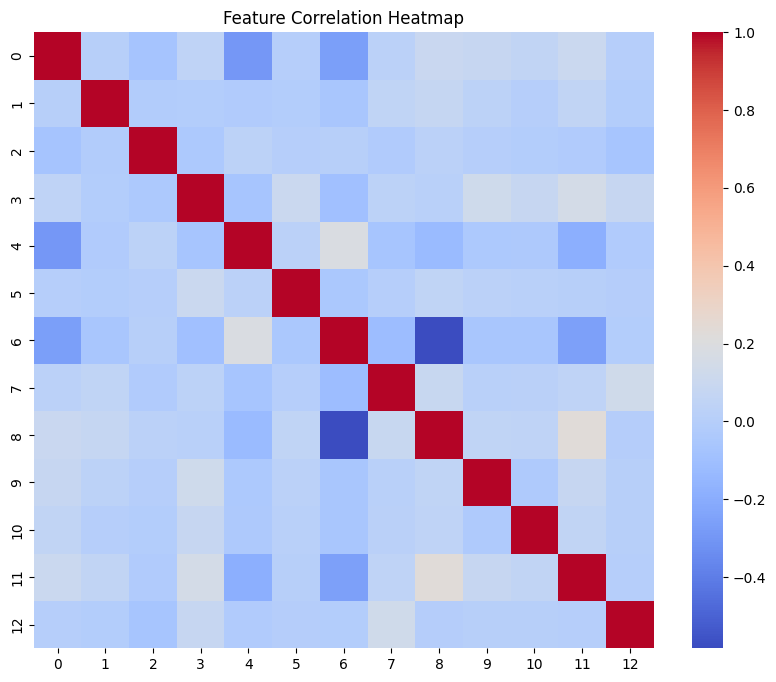

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_scaled).corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### 🔹 7. Train–Test Split (80% Train, 20% Test)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


#### 🔹 8. Model Training & Accuracy Evaluation

##### ✅ 8.1 K-Nearest Neighbors (KNN)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.8270420792079208


##### ✅ 8.2 Logistic Regression

In [22]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", lr_acc)


Logistic Regression Accuracy: 0.823174504950495


##### ✅ 8.3 Multi-Layer Perceptron (MLP Classifier)

In [23]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred_mlp)

print("MLP Classifier Accuracy:", mlp_acc)


MLP Classifier Accuracy: 0.854115099009901


#### 🔹 9. Model Accuracy Comparison


##### ✅ 9.1 Model Accuracy Comparison

In [24]:
print("Model Accuracy Comparison")
print("-------------------------")
print("KNN Accuracy               :", knn_acc)
print("Logistic Regression Accuracy:", lr_acc)
print("MLP Classifier Accuracy     :", mlp_acc)


Model Accuracy Comparison
-------------------------
KNN Accuracy               : 0.8270420792079208
Logistic Regression Accuracy: 0.823174504950495
MLP Classifier Accuracy     : 0.854115099009901


##### ✅ 9.2 Model Accuracy Comparison (Bar Chart)

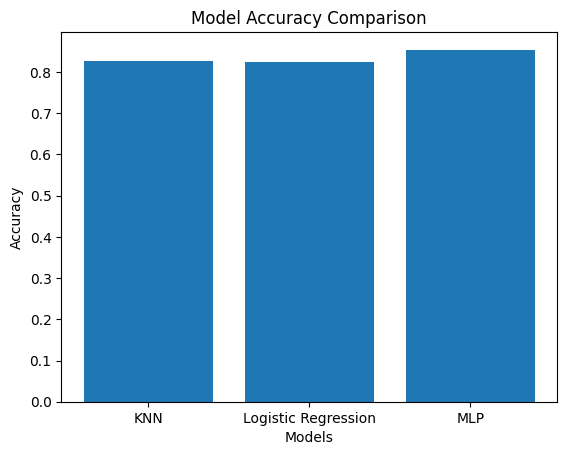

In [25]:
models = ['KNN', 'Logistic Regression', 'MLP']
accuracies = [knn_acc, lr_acc, mlp_acc]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


#### 🔹 10. Evaluation of Best Model (MLP Classifier)

#####  ✅ 10.1 Classification Report

In [26]:
print("Classification Report (MLP Classifier):")
print(classification_report(y_test, y_pred_mlp))


Classification Report (MLP Classifier):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4904
           1       0.73      0.62      0.67      1560

    accuracy                           0.85      6464
   macro avg       0.81      0.78      0.79      6464
weighted avg       0.85      0.85      0.85      6464



#####  ✅ 10.2 Confusion Matrix

In [27]:
print("Confusion Matrix (MLP Classifier):")
confusion_matrix(y_test, y_pred_mlp)


Confusion Matrix (MLP Classifier):


array([[4549,  355],
       [ 588,  972]])

##### ✅ 10.3  Confusion Matrix Heatmap (MLP)

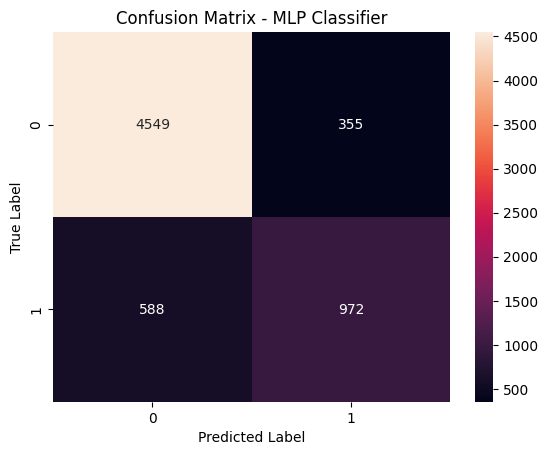

In [28]:
cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MLP Classifier")
plt.show()


## ✅ Final Conclusion

This project successfully demonstrates an end-to-end Machine Learning pipeline for predicting income levels using the Adult Census Income dataset.

Proper data preprocessing and cleaning significantly improved model performance.

Exploratory Data Analysis (EDA) and visualizations provided clear insights into income distribution, feature relationships, and class imbalance.

Logistic Regression performed well for linearly separable data.

K-Nearest Neighbors (KNN) showed sensitivity to feature scaling and dataset size.

The MLP Classifier (Neural Network) achieved the best overall performance, effectively capturing complex and non-linear relationships within the data.

Visual evaluation using accuracy comparison plots and confusion matrix heatmaps enhanced model interpretability.

Overall, the combination of statistical analysis, visual exploration, and machine learning models resulted in a robust and well-structured classification system.

## 🚀 Future Enhancements

The following improvements can be explored to further enhance the project:

Hyperparameter tuning using GridSearchCV

Advanced feature selection techniques

Additional data visualization and interpretability tools

Deployment of the trained model using Flask or Streamlit

Integration with a real-time user interface for predictions